firstly import all the needed libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = yf.download('EURINR=X', start='2023-01-01', end='2024-09-30')

[*********************100%***********************]  1 of 1 completed


In [3]:
print(data.head())

Price                      Adj Close      Close       High        Low  \
Ticker                      EURINR=X   EURINR=X   EURINR=X   EURINR=X   
Date                                                                    
2023-01-02 00:00:00+00:00  88.482002  88.482002  88.400002  87.157700   
2023-01-03 00:00:00+00:00  88.300003  88.300003  88.313004  87.225998   
2023-01-04 00:00:00+00:00  87.219002  87.219002  87.922997  87.219002   
2023-01-05 00:00:00+00:00  87.605003  87.605003  87.807999  86.757004   
2023-01-06 00:00:00+00:00  86.827003  86.827003  87.614998  86.647003   

Price                           Open   Volume  
Ticker                      EURINR=X EURINR=X  
Date                                           
2023-01-02 00:00:00+00:00  87.157700        0  
2023-01-03 00:00:00+00:00  88.292000        0  
2023-01-04 00:00:00+00:00  87.219002        0  
2023-01-05 00:00:00+00:00  87.580002        0  
2023-01-06 00:00:00+00:00  86.819000        0  


In [4]:
print(data.columns)


MultiIndex([('Adj Close', 'EURINR=X'),
            (    'Close', 'EURINR=X'),
            (     'High', 'EURINR=X'),
            (      'Low', 'EURINR=X'),
            (     'Open', 'EURINR=X'),
            (   'Volume', 'EURINR=X')],
           names=['Price', 'Ticker'])


In [8]:
# Assuming data contains the necessary columns for these calculations
# Ensure Typical Price is calculated correctly
data[('Typical Price', '')] = (data[('High', 'EURINR=X')] + 
                               data[('Low', 'EURINR=X')] + 
                               data[('Close', 'EURINR=X')]) / 3

# Moving Average (MA) for Close prices over a 20-day window
data[('MA_20', '')] = data[('Close', 'EURINR=X')].rolling(window=20).mean()

# Bollinger Bands
std_dev = data[('Close', 'EURINR=X')].rolling(window=20).std()
data[('BB_Upper', '')] = data[('MA_20', '')] + (2 * std_dev)
data[('BB_Lower', '')] = data[('MA_20', '')] - (2 * std_dev)

# MA of Typical Price
data[('MA_Typical', '')] = data[('Typical Price', '')].rolling(window=20).mean()

# Define Mean Absolute Deviation function
def mean_absolute_deviation(series):
    return (series - series.mean()).abs().mean()

# Mean Deviation for Typical Price
data[('Mean Deviation', '')] = data[('Typical Price', '')].rolling(window=20).apply(mean_absolute_deviation, raw=False)

# Commodity Channel Index (CCI) calculation
data[('CCI', '')] = (data[('Typical Price', '')] - data[('MA_Typical', '')]) / (0.015 * data[('Mean Deviation', '')])

# Display the last few rows to verify that all columns have been created successfully
print(data[[('Close', 'EURINR=X'), ('MA_20', ''), ('BB_Upper', ''), ('BB_Lower', ''), ('CCI', '')]].tail())


Price                          Close     MA_20   BB_Upper   BB_Lower  \
Ticker                      EURINR=X                                   
Date                                                                   
2024-09-23 00:00:00+00:00  93.110001  92.94000  93.752240  92.127760   
2024-09-24 00:00:00+00:00  92.753998  92.89905  93.657735  92.140366   
2024-09-25 00:00:00+00:00  93.438004  92.88485  93.587223  92.182478   
2024-09-26 00:00:00+00:00  93.000999  92.86995  93.547535  92.192365   
2024-09-27 00:00:00+00:00  93.367996  92.89445  93.607754  92.181146   

Price                             CCI  
Ticker                                 
Date                                   
2024-09-23 00:00:00+00:00  -15.155519  
2024-09-24 00:00:00+00:00    2.106169  
2024-09-25 00:00:00+00:00  152.514953  
2024-09-26 00:00:00+00:00   82.080554  
2024-09-27 00:00:00+00:00  120.854816  


In [9]:
# Check all column names in the DataFrame
print(data.columns)


MultiIndex([(     'Adj Close', 'EURINR=X'),
            (         'Close', 'EURINR=X'),
            (          'High', 'EURINR=X'),
            (           'Low', 'EURINR=X'),
            (          'Open', 'EURINR=X'),
            (        'Volume', 'EURINR=X'),
            ( 'Typical Price',         ''),
            (    'MA_Typical',         ''),
            ('Mean Deviation',         ''),
            (           'CCI',         ''),
            (         'MA_20',         ''),
            (      'BB_Upper',         ''),
            (      'BB_Lower',         '')],
           names=['Price', 'Ticker'])


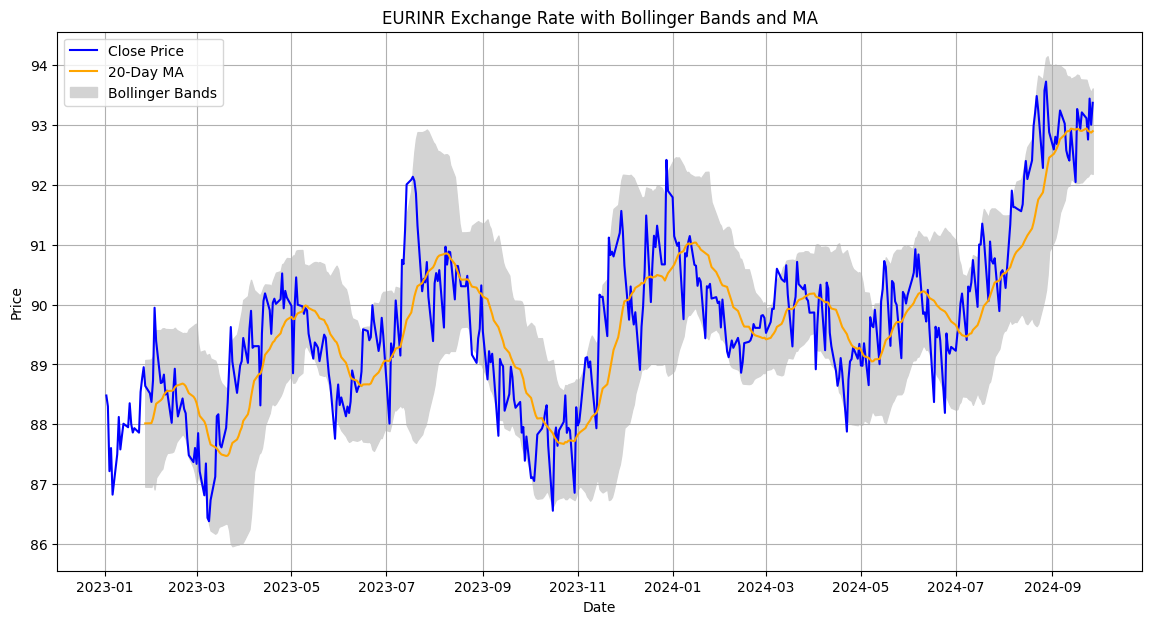

In [11]:
# Convert index to datetime for proper plotting
data.index = pd.to_datetime(data.index)

# Plotting the indicators
plt.figure(figsize=(14, 7))

# Adjusting column references based on column names found in the DataFrame
close_col = 'Close' if 'Close' in data.columns else ('Close', 'EURINR=X')
ma_20_col = 'MA_20' if 'MA_20' in data.columns else ('MA_20', '')
bb_upper_col = 'BB_Upper' if 'BB_Upper' in data.columns else ('BB_Upper', '')
bb_lower_col = 'BB_Lower' if 'BB_Lower' in data.columns else ('BB_Lower', '')

# Plot Closing Price and Moving Average
plt.plot(data.index, data[close_col], label='Close Price', color='blue')
plt.plot(data.index, data[ma_20_col], label='20-Day MA', color='orange')

# Plot Bollinger Bands
plt.fill_between(data.index, 
                 data[bb_upper_col], 
                 data[bb_lower_col], 
                 color='lightgrey', 
                 label='Bollinger Bands')

# Add titles and labels
plt.title('EURINR Exchange Rate with Bollinger Bands and MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


calculating all the metrices for one day and one week as i inspected the data was upto 27 september 2024 only so i adjusted my analysis to it moreover as the mail said to assume on our own i had doubt that there is no mention of making a project of prediction so i decided to take last dates as 20 and 27 september.

In [12]:
data.tail()


Price,Adj Close,Close,High,Low,Open,Volume,Typical Price,MA_Typical,Mean Deviation,CCI,MA_20,BB_Upper,BB_Lower
Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,,,,,,,
Date,,,,,,,,,,,,,
2024-09-23 00:00:00+00:00,93.110001,93.110001,93.202003,92.266701,92.266701,0,92.859568,92.919927,0.265506,-15.155519,92.94000,93.752240,92.127760
2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0,92.891332,92.884077,0.229656,2.106169,92.89905,93.657735,92.140366
2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0,93.383001,92.876027,0.221606,152.514953,92.88485,93.587223,92.182478
2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0,93.154002,92.878327,0.223906,82.080554,92.86995,93.547535,92.192365
2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0,93.344999,92.904743,0.242856,120.854816,92.89445,93.607754,92.181146


In [13]:
# Convert the index to datetime with timezone awareness if not already done
data.index = pd.to_datetime(data.index)

# Ensure the index is aware of its timezone (assuming it is UTC)
data.index = data.index.tz_convert('UTC')

# Create timezone-aware datetime objects for querying
last_day = pd.to_datetime('2024-09-20').tz_localize('UTC')
one_week_later = pd.to_datetime('2024-09-27').tz_localize('UTC')

# Attempt to retrieve data for the specified dates
try:
    last_day_data = data.loc[pd.IndexSlice[last_day, :]]
    one_week_later_data = data.loc[pd.IndexSlice[one_week_later, :]]
    
    print("Data for September 20, 2024:")
    print(last_day_data[['MA_20', 'BB_Upper', 'BB_Lower', 'CCI']])
    
    print("\nData for September 27, 2024:")
    print(one_week_later_data[['MA_20', 'BB_Upper', 'BB_Lower', 'CCI']])
    
except KeyError as e:
    print(f"KeyError: {e}. Check if the dates exist in your DataFrame index.")
except Exception as e:
    print(f"An error occurred: {e}")


Data for September 20, 2024:
Price     Ticker
MA_20               92.898505
BB_Upper            93.757620
BB_Lower            92.039390
CCI                 57.588442
Name: 2024-09-20 00:00:00+00:00, dtype: float64

Data for September 27, 2024:
Price     Ticker
MA_20                92.894450
BB_Upper             93.607754
BB_Lower             92.181146
CCI                 120.854816
Name: 2024-09-27 00:00:00+00:00, dtype: float64


lets analyse the data we got before we proceed to the third step of the assignment 2

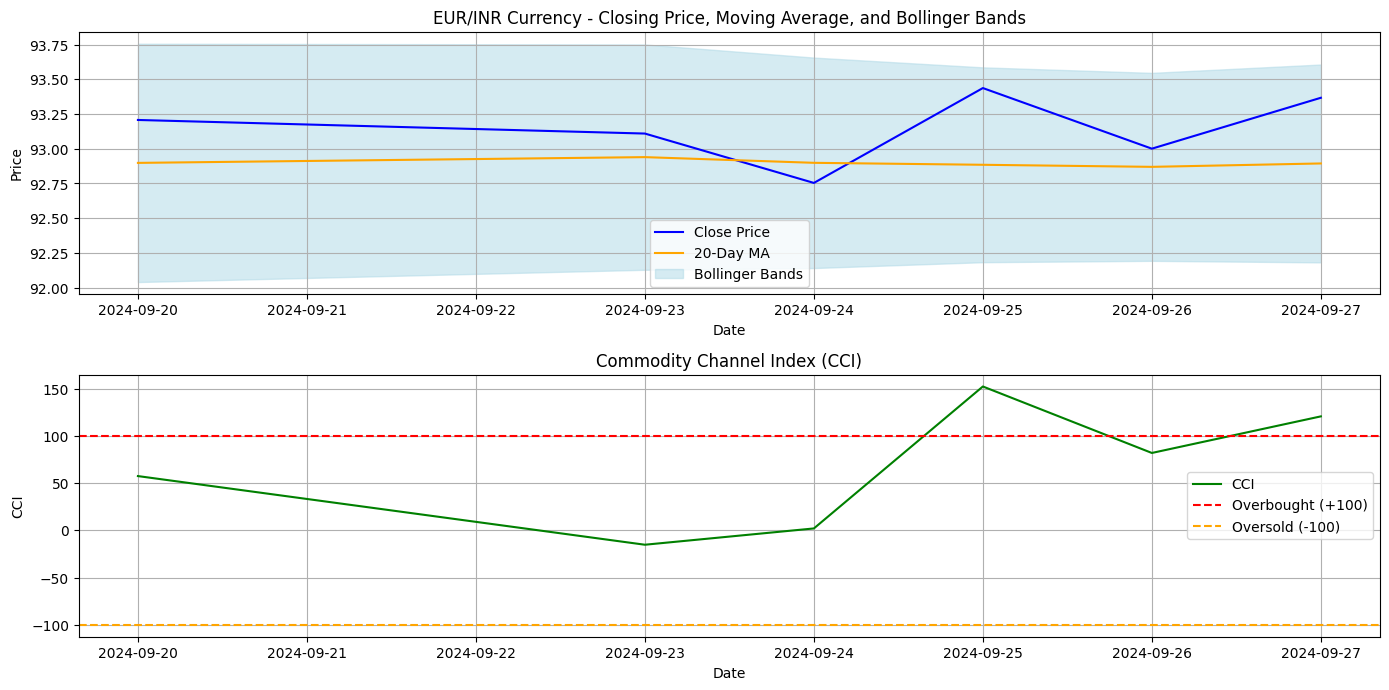

In [14]:
filtered_data = data.loc['2024-09-20':'2024-09-27']

# Define the plotting function
def plot_technical_indicators(data):
    plt.figure(figsize=(14, 10))

    # Plot Closing Price
    plt.subplot(3, 1, 1)
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, data['MA_20'], label='20-Day MA', color='orange')
    plt.fill_between(data.index, data['BB_Upper'], data['BB_Lower'], color='lightblue', alpha=0.5, label='Bollinger Bands')
    plt.title('EUR/INR Currency - Closing Price, Moving Average, and Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Plot CCI
    plt.subplot(3, 1, 2)
    plt.plot(data.index, data['CCI'], label='CCI', color='green')
    plt.axhline(100, color='red', linestyle='--', label='Overbought (+100)')
    plt.axhline(-100, color='orange', linestyle='--', label='Oversold (-100)')
    plt.title('Commodity Channel Index (CCI)')
    plt.xlabel('Date')
    plt.ylabel('CCI')
    plt.legend()
    plt.grid()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the function with the filtered DataFrame
plot_technical_indicators(filtered_data)

so lets assume we have data upto 27 September now we dont have data for 28 Sept or whenever the market opens again so now we will use the metrices we calulated and analysed to make a decision on the next day of whether we should  BUY, SELL or remain NEUTRAL.

In [15]:
def make_trading_decision(last_price, ma_20, bb_upper, bb_lower, cci):
    """
    Make a trading decision based on technical indicators.
    
    Parameters:
    last_price (float): The most recent price.
    ma_20 (float): The 20-day moving average.
    bb_upper (float): The upper Bollinger Band.
    bb_lower (float): The lower Bollinger Band.
    cci (float): The Commodity Channel Index.
    
    Returns:
    str: Trading decision: "BUY", "SELL", or "NEUTRAL".
    """
    
    # Initialize the decision variable
    decision = "NEUTRAL"
    
    # Analyze Moving Average
    if last_price > ma_20:
        ma_signal = "bullish"
    else:
        ma_signal = "bearish"
    
    # Analyze Bollinger Bands
    if last_price > bb_upper:
        bb_signal = "overbought"
    elif last_price < bb_lower:
        bb_signal = "oversold"
    else:
        bb_signal = "neutral"
    
    # Analyze CCI
    if cci > 100:
        cci_signal = "overbought"
    elif cci < -100:
        cci_signal = "oversold"
    else:
        cci_signal = "neutral"
    
    # Decision Logic
    if ma_signal == "bullish" and bb_signal == "oversold" and cci_signal == "oversold":
        decision = "BUY"
    elif ma_signal == "bearish" and bb_signal == "overbought" and cci_signal == "overbought":
        decision = "SELL"
    
    return decision

In [18]:
# date=input("enter the date in yyyy-mm-dd: ")
data.tail(4)
    

Price,Adj Close,Close,High,Low,Open,Volume,Typical Price,MA_Typical,Mean Deviation,CCI,MA_20,BB_Upper,BB_Lower
Ticker,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,EURINR=X,,,,,,,
Date,,,,,,,,,,,,,
2024-09-24 00:00:00+00:00,92.753998,92.753998,93.248001,92.671997,92.775002,0,92.891332,92.884077,0.229656,2.106169,92.89905,93.657735,92.140366
2024-09-25 00:00:00+00:00,93.438004,93.438004,93.627998,93.083000,93.490997,0,93.383001,92.876027,0.221606,152.514953,92.88485,93.587223,92.182478
2024-09-26 00:00:00+00:00,93.000999,93.000999,93.467003,92.994003,92.995003,0,93.154002,92.878327,0.223906,82.080554,92.86995,93.547535,92.192365
2024-09-27 00:00:00+00:00,93.367996,93.367996,93.629997,93.037003,93.371002,0,93.344999,92.904743,0.242856,120.854816,92.89445,93.607754,92.181146


In [17]:

date = '2024-09-20'

# Retrieve individual metrics for the specified date
last_price = data.loc[date, ('Close', 'EURINR=X')]
ma_20 = data.loc[date, ('MA_20', '')]
bb_upper = data.loc[date, ('BB_Upper', '')]
bb_lower = data.loc[date, ('BB_Lower', '')]
cci = data.loc[date, ('CCI', '')]
trading_decision = make_trading_decision(last_price, ma_20, bb_upper, bb_lower, cci)
print(f"Trading Decision: {trading_decision}")

Trading Decision: NEUTRAL


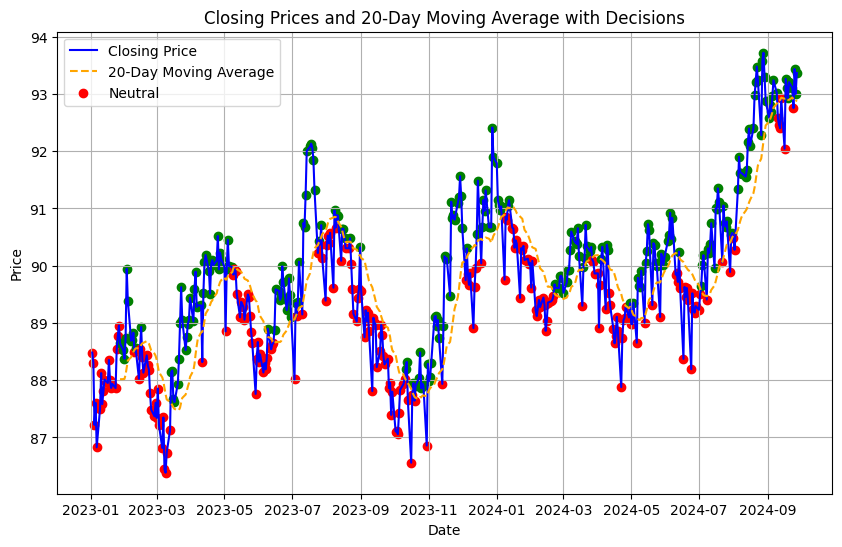

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data[('Close', 'EURINR=X')], label='Closing Price', color='blue')
plt.plot(data.index, data[('MA_20', '')], label='20-Day Moving Average', color='orange', linestyle='--')

# Adding Buy/Neutral markers
for date, close, ma in zip(data.index, data[('Close', 'EURINR=X')], data[('MA_20', '')]):
    if close > ma:
        plt.scatter(date, close, color='green', label='Buy' if date == data.index[0] else "")
    else:
        plt.scatter(date, close, color='red', label='Neutral' if date == data.index[0] else "")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices and 20-Day Moving Average with Decisions')
plt.legend()
plt.grid()
plt.show()

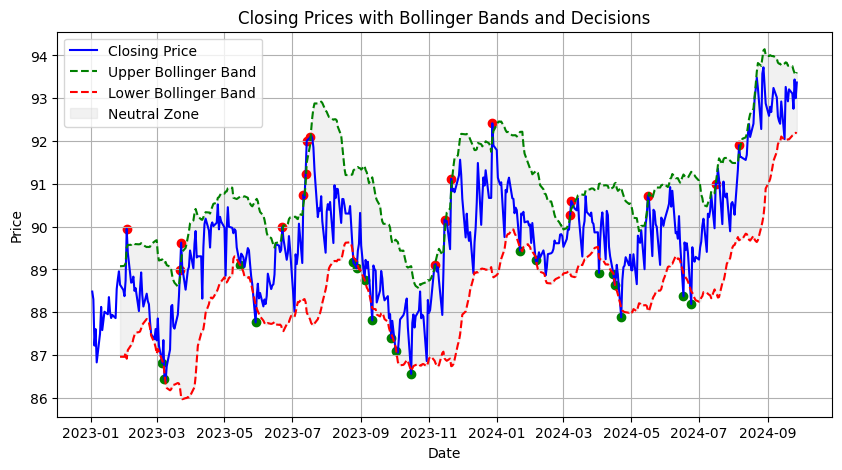

In [22]:
# Plotting Bollinger Bands and Closing Price
plt.figure(figsize=(10, 5))
plt.plot(data.index, data[('Close', 'EURINR=X')], label='Closing Price', color='blue')
plt.plot(data.index, data[('BB_Upper', '')], label='Upper Bollinger Band', color='green', linestyle='--')
plt.plot(data.index, data[('BB_Lower', '')], label='Lower Bollinger Band', color='red', linestyle='--')

# Shading the Neutral Zone
plt.fill_between(data.index, data[('BB_Lower', '')], data[('BB_Upper', '')], color='lightgray', alpha=0.3, label='Neutral Zone')

# Adding Buy/Sell Markers
for date, close, bb_upper, bb_lower in zip(data.index, data[('Close', 'EURINR=X')], data[('BB_Upper', '')], data[('BB_Lower', '')]):
    if close < bb_lower:
        plt.scatter(date, close, color='green', label='Buy' if date == data.index[0] else "")
    elif close > bb_upper:
        plt.scatter(date, close, color='red', label='Sell' if date == data.index[0] else "")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices with Bollinger Bands and Decisions')
plt.legend()
plt.grid()
plt.show()


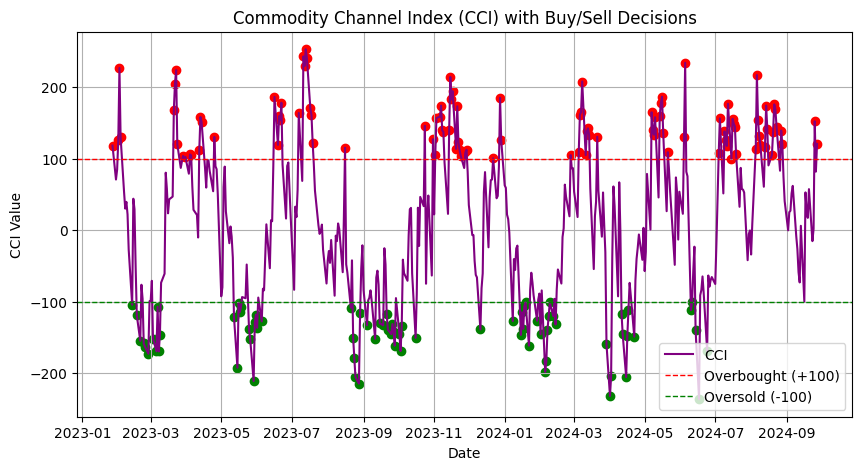

In [23]:
# Plotting CCI with Threshold Lines
plt.figure(figsize=(10, 5))
plt.plot(data.index, data[('CCI', '')], label='CCI', color='purple')

# Adding Threshold Lines
plt.axhline(100, color='red', linestyle='--', linewidth=1, label='Overbought (+100)')
plt.axhline(-100, color='green', linestyle='--', linewidth=1, label='Oversold (-100)')

# Adding Buy/Sell Markers
for date, cci in zip(data.index, data[('CCI', '')]):
    if cci > 100:
        plt.scatter(date, cci, color='red', label='Sell' if date == data.index[0] else "")
    elif cci < -100:
        plt.scatter(date, cci, color='green', label='Buy' if date == data.index[0] else "")

plt.xlabel('Date')
plt.ylabel('CCI Value')
plt.title('Commodity Channel Index (CCI) with Buy/Sell Decisions')
plt.legend()
plt.grid()
plt.show()
